## Задача 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110] # x
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]


### Метод №1 Формулы

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) 
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])



In [3]:
n = len(zp)
b1 = (n*np.sum(zp*ks) - np.sum(zp)*np.sum(ks))/(n*np.sum(zp**2)-np.sum(zp)**2)
b1

2.6205388824027653

In [4]:
b0 = np.mean(ks) - b1*np.mean(zp)
b0

444.17735732435955

In [5]:
y_pred = b0 + b1*zp
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

<function matplotlib.pyplot.show(close=None, block=None)>

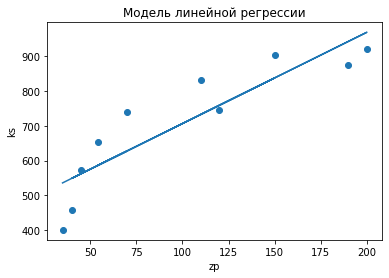

In [6]:
plt.title('Модель линейной регрессии')
plt.xlabel('zp')
plt.ylabel('ks')
plt.scatter(zp, ks)

plt.plot(zp, y_pred)
plt.show

### Матричный метод

In [7]:
x = zp.reshape((len(zp),1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [8]:
y = ks.reshape((len(ks),1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [9]:
X = np.hstack([np.ones((len(zp), 1)), x])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [10]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
B

array([[444.17735732],
       [  2.62053888]])

### Без интерсепт (не добавляем единицы в матрицу)

In [26]:
B = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T @ y)
B

array([[5.88982042]])

#### Коэффициенты линейной регрессии,посчитанные двумя методами, с учетом intercept совпали.
#### Модель линейной регрессии: y_pred = 444.177 + 2.621*zp
#### Без интерсепт:  y_pred = 5.8898*zp

### Задача 2
#### Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [14]:
def mse_(B1, y = ks, x = zp, n = len(zp)):
    return np.sum((B1*x - y)**2)/n
alpha = 1e-6
B1 = 2.5
n = len(zp)
#mse = 1/n *np.sum((B1*x - y)**2)
for i in range(10):
    B1 -= alpha*(2/n)*np.sum((B1*zp - ks)*zp)
    print('B1 = {}'.format(B1))

B1 = 2.5934004
B1 = 2.6842273200987203
B1 = 2.7725516679025763
B1 = 2.858442397286523
B1 = 2.9419665622256077
B1 = 3.023189369143293
B1 = 3.102174227817414
B1 = 3.178982800883515
B1 = 3.2536750519742115
B1 = 3.3263092925321556


In [16]:
for i in range(3000):
    B1 -= alpha*(2/n)*np.sum((B1*zp - ks)*zp)
    if i % 500 == 0:
        print('B1 = {}'.format(B1))
        print('mse = {}'.format(mse_(B1)))

B1 = 5.889820420132673
mse = 56516.85841571943
B1 = 5.889820420132673
mse = 56516.85841571943
B1 = 5.889820420132673
mse = 56516.85841571943
B1 = 5.889820420132673
mse = 56516.85841571943
B1 = 5.889820420132673
mse = 56516.85841571943
B1 = 5.889820420132673
mse = 56516.85841571943


In [17]:
mse_(5.8898)

56516.858421464

Без intercept модель линейной регрессии: y_pred = 5.8898*zp

<function matplotlib.pyplot.show(close=None, block=None)>

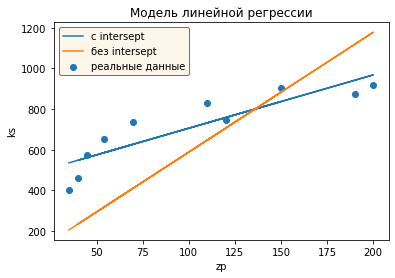

In [25]:
plt.title('Модель линейной регрессии')
plt.xlabel('zp')
plt.ylabel('ks')

# fig, ax = plt.subplots()
# ax.scatter(zp, ks, 'реальные данные')
# ax.plot(zp, y_pred, label = 'c intersept')
# ax.plot(zp, 5.8898*zp, label = 'без intersept')


plt.scatter(zp, ks, label = 'реальные данные')
plt.plot(zp, y_pred, label = 'c intersept')
plt.plot(zp, 5.8898*zp, label = 'без intersept')
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r'    #  цвет крайней линии
         )

plt.show

### Задача 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [57]:
def mse1(B1, B0, y = ks, x = zp, n = len(zp)):
    return np.sum((B1*x + B0 - y)**2)/n
alpha = 1e-5
B1 = 2.6
B0 = 444.1
n = len(zp)
#mse = 1/n *np.sum((B1*x - y)**2)
for i in range(10):
    a = B1
    B1 -= alpha*(2/n)*np.sum((B1*zp + B0 - ks)*zp)
    B0 -= alpha*(2/n)*np.sum(B0+ a*zp - ks)
    print('B1 = {}'.format(B1))
    print('B0 = {}'.format(B0))
    

B1 = 2.605816
B0 = 444.1000432
B1 = 2.6100294182784
B0 = 444.100074604288
B1 = 2.6130818413038197
B0 = 444.1000974631357
B1 = 2.6152931777504564
B0 = 444.10011413121225
B1 = 2.616895186440419
B0 = 444.1001263143651
B1 = 2.618055765764585
B0 = 444.10013524840076
B1 = 2.6188965502281807
B0 = 444.10014182860283
B1 = 2.619505658322303
B0 = 444.1001467035624
B1 = 2.6199469277586176
B0 = 444.10015034315325
B1 = 2.6202666059635153
B0 = 444.1001530877769


In [59]:
for i in range(1001000):
    a = B1
    B1 -= alpha*(2/n)*np.sum((B1*zp + B0 - ks)*zp)
    B0 -= alpha*(2/n)*np.sum(B0+ a*zp - ks)
    if i % 100000 == 0:
        print('B1 = {B1}, B0 = {B0}, mse = {mse}'.format(B1 = B1, B0 = B0, mse = mse1(B1, B0)))
      

B1 = 2.6205424413076654, B0 = 444.1768738065437, mse = 6470.414201235964
B1 = 2.62054102527963, B0 = 444.17706619010056, mse = 6470.414201198161
B1 = 2.6205401726652022, B0 = 444.1771820274937, mse = 6470.414201184458
B1 = 2.620539659291614, B0 = 444.17725177514995, mse = 6470.4142011794875
B1 = 2.6205393501807, B0 = 444.1772937713927, mse = 6470.414201177684
B1 = 2.6205391640597777, B0 = 444.1773190580425, mse = 6470.41420117703
B1 = 2.6205390519932283, B0 = 444.1773342835612, mse = 6470.414201176793
B1 = 2.620538984516055, B0 = 444.17734345110466, mse = 6470.414201176709
B1 = 2.6205389438869, B0 = 444.1773489710388, mse = 6470.414201176677
B1 = 2.6205389194234208, B0 = 444.17735229468144, mse = 6470.414201176667
B1 = 2.620538904693533, B0 = 444.17735429590465, mse = 6470.414201176665


In [ ]:
y_pred = 444.177 + 2.621*zp